In [2]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import torch

sys.path.append(os.path.join(os.getenv("HOME"), "RNN_Manifold/"))
import decode_1d, generate_1d, geometry_util

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("using device {}".format(device))

using device cuda


In [ ]:
encoder_2d, decoder_2d, _ = generate_1d.train(0, 1, 2, device, n_training_iterations=7000)

/home/trevor/brainvenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


iteration: 0, decoding loss: 1.5505626201629639, distance cost: 0.16066187620162964
iteration: 18, decoding loss: 1.0979759693145752, distance cost: 0.5315225124359131
iteration: 52, decoding loss: 1.1658169031143188, distance cost: 0.4586714208126068
iteration: 75, decoding loss: 0.9673251509666443, distance cost: 0.5601717829704285
iteration: 76, decoding loss: 0.8344234228134155, distance cost: 0.540930449962616


In [4]:
phases = np.arange(start=-np.pi, stop=np.pi, step=0.01)
phases_torch = torch.tensor(np.expand_dims(phases, -1), dtype=torch.get_default_dtype()).to(device)
with torch.no_grad():
    test_embedding_2d = encoder_2d(phases_torch)
test_embedding_2d = test_embedding_2d.cpu().numpy()

NameError: name 'encoder_2d' is not defined

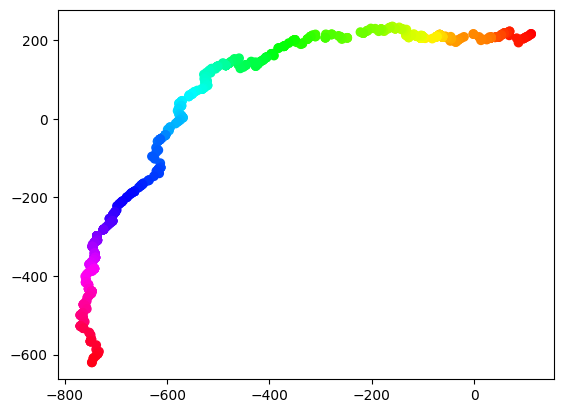

In [5]:
fig, axs = plt.subplots()
axs.scatter(test_embedding_2d[:, 0], test_embedding_2d[:, 1], cmap="hsv", c=phases)
plt.show()


In [6]:
import importlib
importlib.reload(generate_1d)
with torch.no_grad():
    _, pred_phases, _ = generate_1d.encode_decode_cost(encoder_2d, decoder_2d, phases_torch)
pred_phases = pred_phases.cpu().numpy()

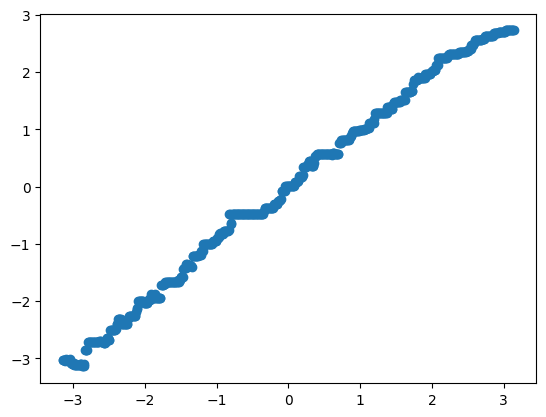

In [7]:
%matplotlib inline
fig, axs = plt.subplots()
axs.scatter(phases, pred_phases)

In [9]:
encoder_3d, decoder_3d, _ = generate_1d.train(0, 1, 3, device, n_training_iterations=5000)


iteration: 0, decoding loss: 3.0061237812042236, distance cost: 0.055288348346948624
iteration: 1, decoding loss: 2.3145194053649902, distance cost: 0.029206249862909317
iteration: 2, decoding loss: 0.967376172542572, distance cost: 0.02354080229997635
iteration: 3, decoding loss: 0.9740185141563416, distance cost: 0.007349519059062004
iteration: 6, decoding loss: 0.8337931036949158, distance cost: 0.0911542996764183
iteration: 35, decoding loss: 0.7625647187232971, distance cost: 0.11336499452590942
iteration: 206, decoding loss: 0.8673851490020752, distance cost: 0.00688253715634346
iteration: 207, decoding loss: 0.842326819896698, distance cost: 0.005810556001961231
iteration: 210, decoding loss: 0.8326376080513, distance cost: 0.00824776291847229
iteration: 212, decoding loss: 0.8299821615219116, distance cost: 0.0077434685081243515
iteration: 215, decoding loss: 0.8140203952789307, distance cost: 0.010016622953116894
iteration: 224, decoding loss: 0.798262357711792, distance cost:


KeyboardInterrupt



In [9]:
with torch.no_grad():
    test_embedding_3d = encoder_3d(phases_torch)
test_embedding_3d = test_embedding_3d.cpu().numpy()

In [10]:
%matplotlib tk
proj_fig = plt.figure()
proj_axs = proj_fig.add_subplot(projection="3d")
proj_axs.scatter(test_embedding_3d[:, 0], test_embedding_3d[:, 1], test_embedding_3d[:, 2], cmap="hsv", c=phases)
plt.show()


In [5]:
encoder_high, decoder_high, _ = generate_1d.train(0, 1, 12, device, n_training_iterations=5000)


iteration: 0, decoding loss: 2.110142946243286, distance cost: 0.022694973275065422
iteration: 1, decoding loss: 1.4454351663589478, distance cost: 0.08829831331968307
iteration: 2, decoding loss: 0.8164396286010742, distance cost: 0.15373127162456512
iteration: 3, decoding loss: 0.7637235522270203, distance cost: 0.17832419276237488
iteration: 10, decoding loss: 0.7357354760169983, distance cost: 0.18020972609519958
iteration: 19, decoding loss: 0.8060774207115173, distance cost: 0.09456923604011536
iteration: 20, decoding loss: 0.7661803364753723, distance cost: 0.09990135580301285
iteration: 21, decoding loss: 0.6883668303489685, distance cost: 0.09257172048091888
iteration: 22, decoding loss: 0.6213085651397705, distance cost: 0.09673413634300232
iteration: 23, decoding loss: 0.5751147866249084, distance cost: 0.09326180070638657
iteration: 33, decoding loss: 0.5596417784690857, distance cost: 0.10831711441278458
iteration: 75, decoding loss: 0.5720596313476562, distance cost: 0.07

KeyboardInterrupt: 

In [12]:
with torch.no_grad():
    test_embedding_high = encoder_high(phases_torch)
test_embedding_high = test_embedding_high.cpu().numpy()
test_embedding_high = test_embedding_high/np.mean(np.abs(test_embedding_high))

In [14]:
import importlib
importlib.reload(decode_1d)
encoder, decoder, _ = decode_1d.train(test_embedding_high, 0, 1, device, integration_resamples=15)


/home/trevor/brainvenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


AttributeError: 'Encoder1D' object has no attribute 'closest_points_on_manifold'